<a href="https://colab.research.google.com/github/stethbo/PWr/blob/main/symulacja_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime

Losujemy wektor 'zamówień' z rozkładu normalnego wybieramy 200 wartości odpowiadających o której godzinie zostało złożone zamówienie. Listę tą sortujemy od najmniejszej wartości aby odpowiadalo to logice kolejności w czasie.

['18:57:00', '20:03:00', '16:39:00', '16:18:00', '17:41:00', '18:04:00', '19:45:00', '18:16:00', '22:18:00', '16:44:00', '19:47:00', '18:53:00', '20:53:00', '18:50:00', '20:33:00', '18:57:00', '20:13:00', '18:57:00', '18:42:00', '20:32:00', '19:08:00', '19:41:00', '20:46:00', '20:46:00', '23:08:00', '19:40:00', '17:13:00', '19:32:00', '21:42:00', '20:15:00', '21:00:00', '19:56:00', '19:43:00', '18:22:00', '20:03:00', '18:48:00', '18:01:00', '20:04:00', '21:01:00', '19:17:00', '19:34:00', '17:33:00', '17:52:00', '18:39:00', '18:05:00', '18:10:00', '19:45:00', '20:11:00', '18:24:00', '21:35:00', '22:48:00', '18:57:00', '20:11:00', '19:19:00', '20:58:00', '19:45:00', '19:12:00', '18:45:00', '20:14:00', '18:51:00', '16:55:00', '19:17:00', '20:15:00', '18:08:00', '20:37:00', '19:42:00', '16:01:00', '16:10:00', '20:35:00', '18:43:00', '20:07:00', '21:58:00', '20:11:00', '16:21:00', '19:36:00', '19:30:00', '21:43:00', '18:56:00', '19:17:00', '19:54:00', '19:40:00', '16:02:00', '19:41:00', '17

Text(0.5, 1.0, 'Rozkład ilości zamówień w czasie')

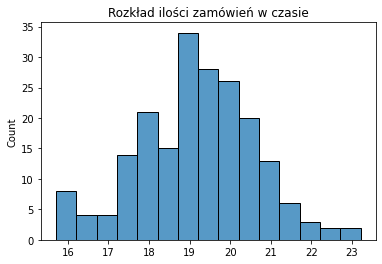

In [ ]:
num_of_orders = 200
# z - lista godzin zamówień(od 15 do 23)
z = np.random.normal(19, 1.5, num_of_orders)

# konwersja godzin na minuty
z_minutes = z.copy()
z_minutes *= 60
z_minutes = np.round(z_minutes)
z_readable = list()
# konwersja na godzine w formacie dogodnym dla człowieka
for mins in z_minutes:
  hour = str(datetime.timedelta(minutes=mins))
  z_readable.append(hour)


print(z_readable)


sns.histplot(z, binwidth=0.5, kde=False).set_title('Rozkład ilości zamówień w czasie')


Dla każdego zamówienia z wektora z losujemy jak daleko od restauracji trzeba dowieźć zamóienie.

Text(0.5, 1.0, 'Rozkład odległości dowozów')

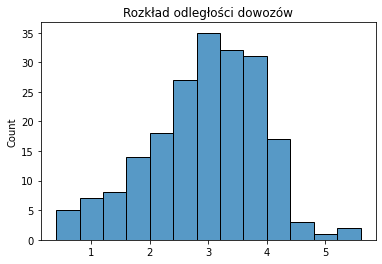

In [ ]:
distances = abs(np.random.normal(3, 1, num_of_orders))

sns.histplot(distances, binwidth=0.4, kde=False).set_title('Rozkład odległości dowozów')

Następnie łączymy wektor zamówień z wektorem dystansów

In [ ]:
dist_time = list(zip(distances, z_minutes, z_readable))
print(dist_time)
orders = sorted(dist_time, key=lambda x: x[1])
print(orders)

[(2.3997913879783153, 1137.0, '18:57:00'), (1.2771274295233348, 1203.0, '20:03:00'), (3.049934285186352, 999.0, '16:39:00'), (1.2000190439697056, 978.0, '16:18:00'), (3.095940418477779, 1061.0, '17:41:00'), (2.0365679969425057, 1084.0, '18:04:00'), (3.257842939139254, 1185.0, '19:45:00'), (3.6713401092120597, 1096.0, '18:16:00'), (3.7481569226482323, 1338.0, '22:18:00'), (2.62429279503796, 1004.0, '16:44:00'), (3.2426141341910357, 1187.0, '19:47:00'), (3.5385308303412915, 1133.0, '18:53:00'), (0.765411503884124, 1253.0, '20:53:00'), (3.718026231869816, 1130.0, '18:50:00'), (3.9688455635084465, 1233.0, '20:33:00'), (3.010155316959417, 1137.0, '18:57:00'), (3.313361543596466, 1213.0, '20:13:00'), (4.275668683516324, 1137.0, '18:57:00'), (4.563863234409176, 1122.0, '18:42:00'), (3.0254449986249474, 1232.0, '20:32:00'), (2.183793194736091, 1148.0, '19:08:00'), (3.127903451137892, 1181.0, '19:41:00'), (2.1001342161092564, 1246.0, '20:46:00'), (1.4218899260293232, 1246.0, '20:46:00'), (3.767

In [ ]:
c_type = list()
c_price  = list()
amounts = {'rower': 4, 'hulajnoga': 3, 'skuter': 2}
speeds = {'rower': 18, 'hulajnoga': 22, 'skuter': 40}
prices = {'rower': 22, 'hulajnoga': 28, 'skuter': 35}

for name in amounts:
  for i in range(amounts[name]):
    c_type.append(speeds[name])
    c_price.append(prices[name])

print(c_type)
print(c_price)

couriers = np.zeros_like(c_type)
start_time = orders[0][1]
cur_time = orders[0][1]
total_time = 0
total_cost = 0

[18, 18, 18, 18, 22, 22, 22, 40, 40]
[22, 22, 22, 22, 28, 28, 28, 35, 35]


Pętla symulująca upływ czasu. Dodaje kolejne zlecenia kurierom gdy nie są w trakcie żadnego innego zlecenia. Sumuje koszt oraz zlicza całkowity czas dostarczenia wszystkich zamówień.

In [ ]:
while orders:
  for c in range(len(couriers)):
    if couriers[c] > 0:
      couriers[c] -= 1
    elif len(orders) > 0 and couriers[c] == 0 and cur_time >= orders[0][1]:
      t = orders.pop(0)[0] / c_type[c]
      couriers[c] = round(t * 60) * 2
      total_cost += t * c_price[c]
  cur_time +=1
  total_time += 1  


In [ ]:
total_time += max(couriers)
print(total_time)
print('Total time: ', datetime.timedelta(minutes=round(total_time)))
print('Total cost: ', total_cost)
print('All orders shipped')

498
Total time:  8:18:00
Total cost:  666.0555870130576
All orders shipped
